# Zomato EDA 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns',None)

C:\Users\thala\Anaconda3\envs\eda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\thala\Anaconda3\envs\eda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\thala\Anaconda3\envs\eda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df.drop(['url','address','phone','reviews_list','menu_item','dish_liked'],axis=1, inplace=True)

In [5]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Data Cleaning

In [6]:
def NullCount(data):
    for feature in data.columns:
        print(feature," Number of Null values = ",data[feature].isnull().sum())

NullCount(df)

name  Number of Null values =  0
online_order  Number of Null values =  0
book_table  Number of Null values =  0
rate  Number of Null values =  7775
votes  Number of Null values =  0
location  Number of Null values =  21
rest_type  Number of Null values =  227
cuisines  Number of Null values =  45
approx_cost(for two people)  Number of Null values =  346
listed_in(type)  Number of Null values =  0
listed_in(city)  Number of Null values =  0


In [7]:
df.shape

(51717, 11)

When compare with the shape of the data we can see that there is a lot of null value in rate column so we cannot directly delete the null values 

Change the structure of the rate column to fill null values

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
def change_rate(value):
    if value == 'NEW' or value == '-':
        return np.nan
    else:
        rate = str(value).split('/')
        rate = rate[0]
        return float(rate)
    

In [10]:
df['rate'] = df['rate'].apply(change_rate)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [11]:
df['rate'].unique()


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

Now replace the null values with mean of the rate column

In [12]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [13]:
NullCount(df)

name  Number of Null values =  0
online_order  Number of Null values =  0
book_table  Number of Null values =  0
rate  Number of Null values =  0
votes  Number of Null values =  0
location  Number of Null values =  21
rest_type  Number of Null values =  227
cuisines  Number of Null values =  45
approx_cost(for two people)  Number of Null values =  346
listed_in(type)  Number of Null values =  0
listed_in(city)  Number of Null values =  0


Now we can clean or delete all the null values

In [14]:
df.dropna(inplace=True)
NullCount(df)

name  Number of Null values =  0
online_order  Number of Null values =  0
book_table  Number of Null values =  0
rate  Number of Null values =  0
votes  Number of Null values =  0
location  Number of Null values =  0
rest_type  Number of Null values =  0
cuisines  Number of Null values =  0
approx_cost(for two people)  Number of Null values =  0
listed_in(type)  Number of Null values =  0
listed_in(city)  Number of Null values =  0


In [15]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [16]:
df.shape

(51148, 11)

Now check the votes columns for any unusall values

In [17]:
df['votes'].dtype

dtype('int64')

In [18]:
df['votes'].value_counts()

0       9863
4       1130
6        984
7        858
9        735
        ... 
1108       1
1922       1
2511       1
5308       1
843        1
Name: votes, Length: 2326, dtype: int64

All the values are in integer so there is no string values

Next look at the approx_cost(for two people) feature

In [19]:
#Rename the column name to further simplicity
df = df.rename(columns={'approx_cost(for two people)': 'avg_cost'})
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [20]:
df['avg_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

There are lot of ',' in the data values so we have to change all that inorder to change the feature type into integer

In [21]:
def change_avgcost(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
    return float(value)

df['avg_cost'] = df['avg_cost'].apply(change_avgcost)


In [22]:
df['avg_cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [23]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


Next we have two location columns so check if whetere both are valid or not.

In [25]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [26]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

Both of them are share some of the common places so we can delete the columns that have less number of unique values

In [27]:
df.drop('listed_in(city)',axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [28]:
df['location'].value_counts()

BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

There are more than 93 unique values and a lot of them less amount so we can change some of them into a new value called other


In [29]:
locations = df['location'].value_counts(ascending=False)

In [30]:
locations.mean()

549.9784946236559

we can change the location that have less than 500 rows into others

In [31]:
location_less_than_500 = locations[locations<500]

In [32]:
location_less_than_500

Shivajinagar                     499
Cunningham Road                  491
Domlur                           482
Old Airport Road                 437
Ejipura                          434
Commercial Street                370
St. Marks Road                   343
Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            216
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    151
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
S

In [33]:
def change_location(value):
    if value in location_less_than_500:
        return 'others'
    else:
        return value

In [34]:
df['location'] = df['location'].apply(change_location)

In [35]:
df['location'].value_counts()

others                   8018
BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1248
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Ulsoor                   1017
Koramangala 4th Block    1017
Banashankari              904
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
Lavelle Ro

In [36]:
df.sample(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_in(type)
1547,Maruthi Bar & Restaurant,No,No,3.700449,0,Bannerghatta Road,Casual Dining,"Chinese, Seafood",800.0,Delivery
42822,Aubree,Yes,No,3.200000,6,others,"Cafe, Bakery","Cafe, Bakery",400.0,Delivery
17566,Smoor,Yes,No,4.600000,1687,Indiranagar,"Dessert Parlor, Cafe","Desserts, Cafe, Beverages",900.0,Cafes
16833,Wangs Kitchen,Yes,No,2.400000,438,HSR,Casual Dining,Chinese,1000.0,Delivery
26139,FireHouse - Bar & Kitchen,Yes,Yes,3.900000,764,others,Pub,"Continental, American, Chinese, BBQ, Salad, It...",1500.0,Dine-out


Next column is rest_type which denote the type of the restaurant

In [37]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [38]:
df['rest_type'].value_counts()

Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [39]:
rest_types = df['rest_type'].value_counts(ascending=False)


In [40]:
rest_types_lessthan1000 = rest_types[rest_types<1000]

In [41]:
rest_types_lessthan1000

Beverage Shop                 865
Bar                           686
Food Court                    619
Sweet Shop                    468
Bar, Casual Dining            415
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [42]:
def change_resttype(value):
    if value in rest_types_lessthan1000:
        return 'others'
    else:
        return value
    
        

In [43]:
df['rest_type'] = df['rest_type'].apply(change_resttype)
df['rest_type'].value_counts()

Quick Bites           19046
Casual Dining         10273
others                 9028
Cafe                   3687
Delivery               2578
Dessert Parlor         2245
Takeaway, Delivery     2014
Bakery                 1141
Casual Dining, Bar     1136
Name: rest_type, dtype: int64

In [44]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


Next column is cuisines do the same process to reduce the value count

In [45]:
df['cuisines'].value_counts()

North Indian                                 2858
North Indian, Chinese                        2355
South Indian                                 1822
Biryani                                       906
Bakery, Desserts                              899
                                             ... 
Beverages, Burger                               1
North Indian, Mughlai, Lucknowi                 1
Continental, Thai, North Indian, Chinese        1
North Indian, Bengali, Chinese, Beverages       1
North Indian, Chinese, Arabian, Momos           1
Name: cuisines, Length: 2704, dtype: int64

In [46]:
cuisines = df['cuisines'].value_counts(ascending=False)


In [47]:
cuisines_less_than100 = cuisines[cuisines<100]
cuisines_less_than100

North Indian, Continental, Chinese           97
Juices                                       94
Bengali, North Indian                        93
Fast Food, North Indian                      93
Tibetan, Momos                               90
                                             ..
Beverages, Burger                             1
North Indian, Mughlai, Lucknowi               1
Continental, Thai, North Indian, Chinese      1
North Indian, Bengali, Chinese, Beverages     1
North Indian, Chinese, Arabian, Momos         1
Name: cuisines, Length: 2635, dtype: int64

In [48]:
def change_cuisune(value):
    if value in cuisines_less_than100:
        return 'others'
    else:
        return value

In [49]:
df['cuisines'] = df['cuisines'].apply(change_cuisune)
df['cuisines'].value_counts()

others                                 26220
North Indian                            2858
North Indian, Chinese                   2355
South Indian                            1822
Biryani                                  906
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [50]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


At last change the column listed_in(type) into type for further simplicity

In [51]:
df.rename(columns={'listed_in(type)':'type'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [52]:
df['type'].value_counts()

Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: type, dtype: int64

There is no change or cleaning to do in column type

# Data Visualisation

### Online order count

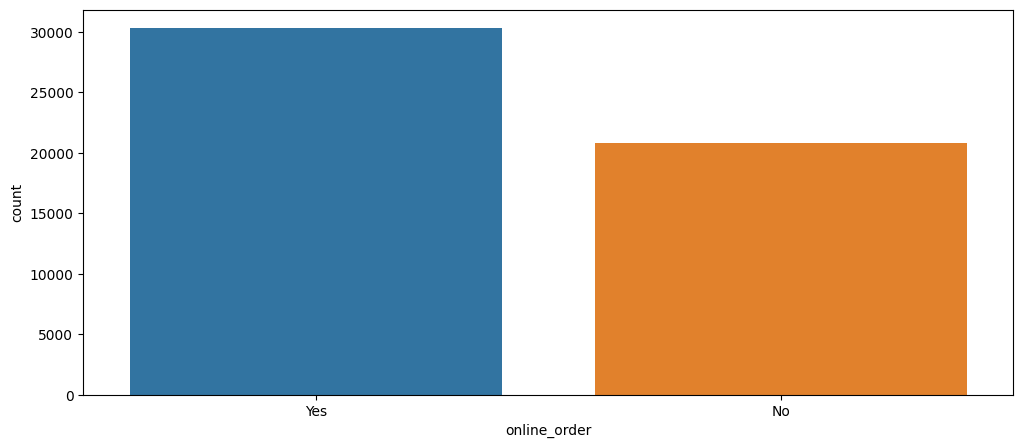

In [53]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='online_order')
plt.show()

### Location count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Indiranagar'),
  Text(19, 0, 'Koramangala 1st Block'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'MG Road'),
  Text(22, 0, 'Brigade Road'),
  Text(23, 0, 'Lavelle Road'),
  Text(24, 0, 'Church Street'),
  Text(25, 0, 'Ulsoor'),
  Text(26, 0, 'Residency Road'),
  Text(

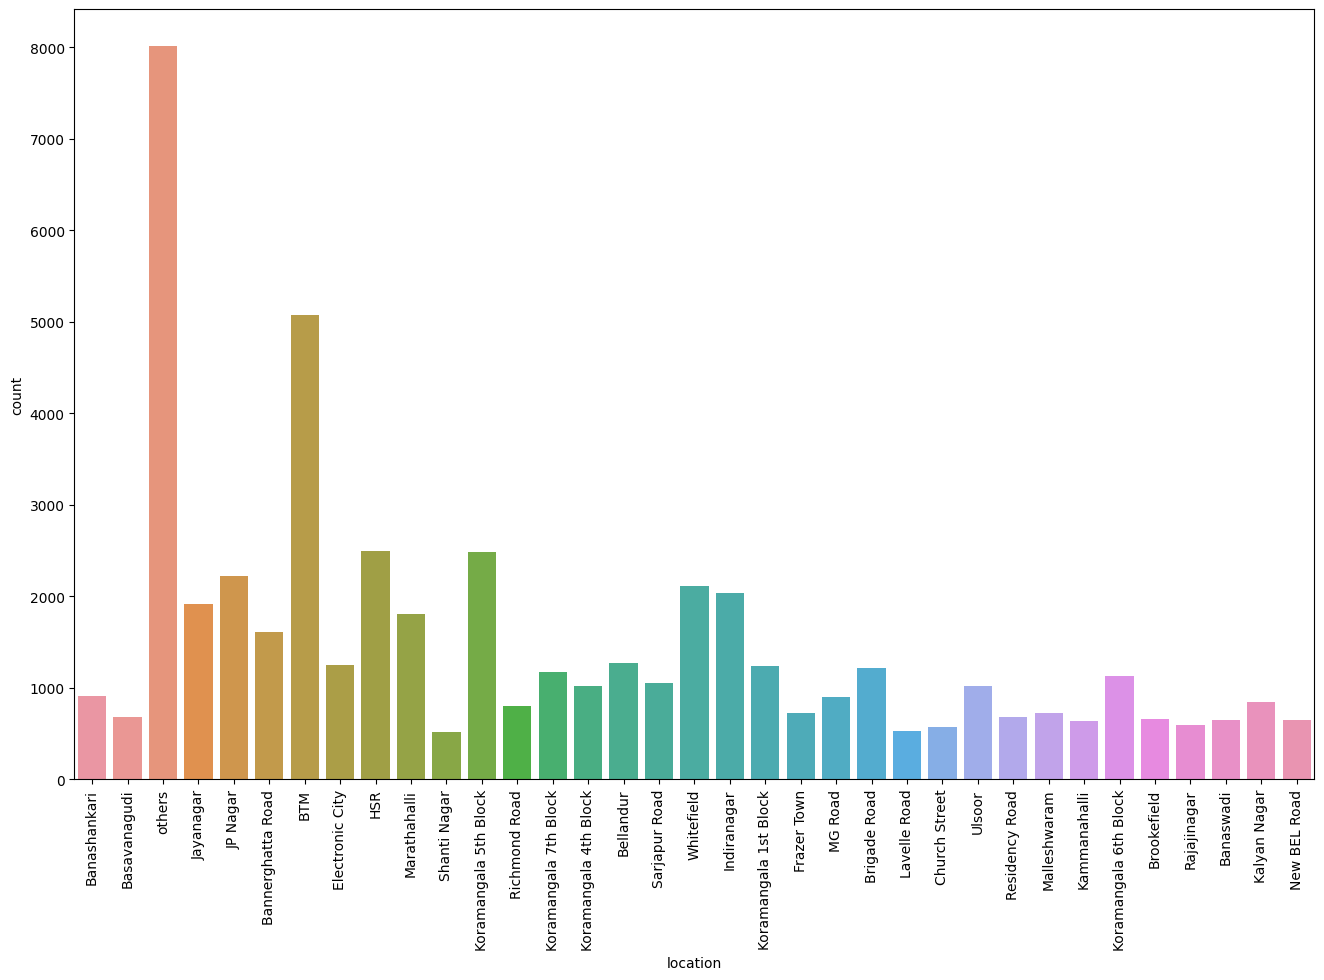

In [64]:
plt.figure(figsize=(16,10))
sns.countplot(data=df,x='location')
plt.xticks(rotation=90)

### Online order location wise

In [66]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1,values=None, index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1766  3305
Banashankari            397   507
Banaswadi               302   343
Bannerghatta Road       687   924
Basavanagudi            243   441
Bellandur               519   752
Brigade Road            553   665
Brookefield             239   417
Church Street           226   343
Electronic City         676   572
Frazer Town             288   432
HSR                     585  1911
Indiranagar             701  1332
JP Nagar                911  1308
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            265   375
Koramangala 1st Block   384   853
Koramangala 4th Block   459   558
Koramangala 5th Block   867  1614
Koramangala 6th Block   445   684
Koramangala 7th Block   390   786
Lavelle Road            317   206
MG Road                 520   374
Malleshwaram            309   415
Marathahalli            701  1107
New BEL Road            255   389
Rajajinagar             286   305
Residency Road          426   248
Richmond Road           557   247
Sarjapur Road           324   725
Shanti Nagar            289   222
Ulsoor                  389   628
Whitefield              986  1123
others                 3673  4345

<AxesSubplot: xlabel='location'>

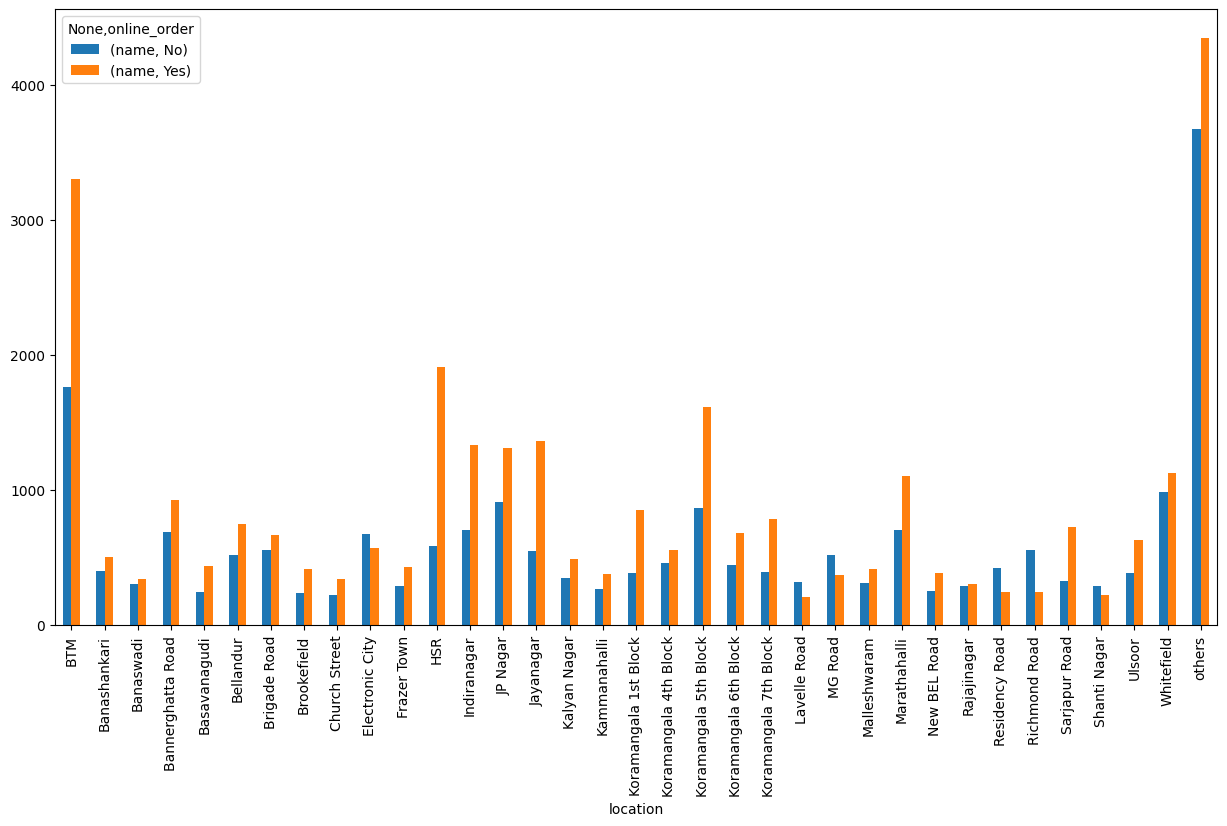

In [71]:
df1.plot(kind='bar',figsize=(15,8))

### Book table location wise

In [74]:
df1 = df.groupby(['location','book_table'])['name'].count()
df1.to_csv('book_table_location_wise.csv')
df1=pd.read_csv('book_table_location_wise.csv')
df1 = pd.pivot_table(df1,values=None, index=['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)
df1

name     
book_table               No  Yes
location                        
BTM                    4903  168
Banashankari            840   64
Banaswadi               637    8
Bannerghatta Road      1512   99
Basavanagudi            668   16
Bellandur              1173   98
Brigade Road           1039  179
Brookefield             582   74
Church Street           387  182
Electronic City        1149   99
Frazer Town             712    8
HSR                    2279  217
Indiranagar            1579  454
JP Nagar               1904  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            591   49
Koramangala 1st Block  1187   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1789  692
Koramangala 6th Block  1016  113
Koramangala 7th Block  1012  164
Lavelle Road            291  232
MG Road                 547  347
Malleshwaram            635   89
Marathahalli           1642  166
New BEL Road            588   56
Rajajinagar             550   41
Residency Road          523  151
Richmond Road           688  116
Sarjapur Road           893  156
Shanti Nagar            453   58
Ulsoor                  840  177
Whitefield             1856  253
others                 7210  808

<AxesSubplot: xlabel='location'>

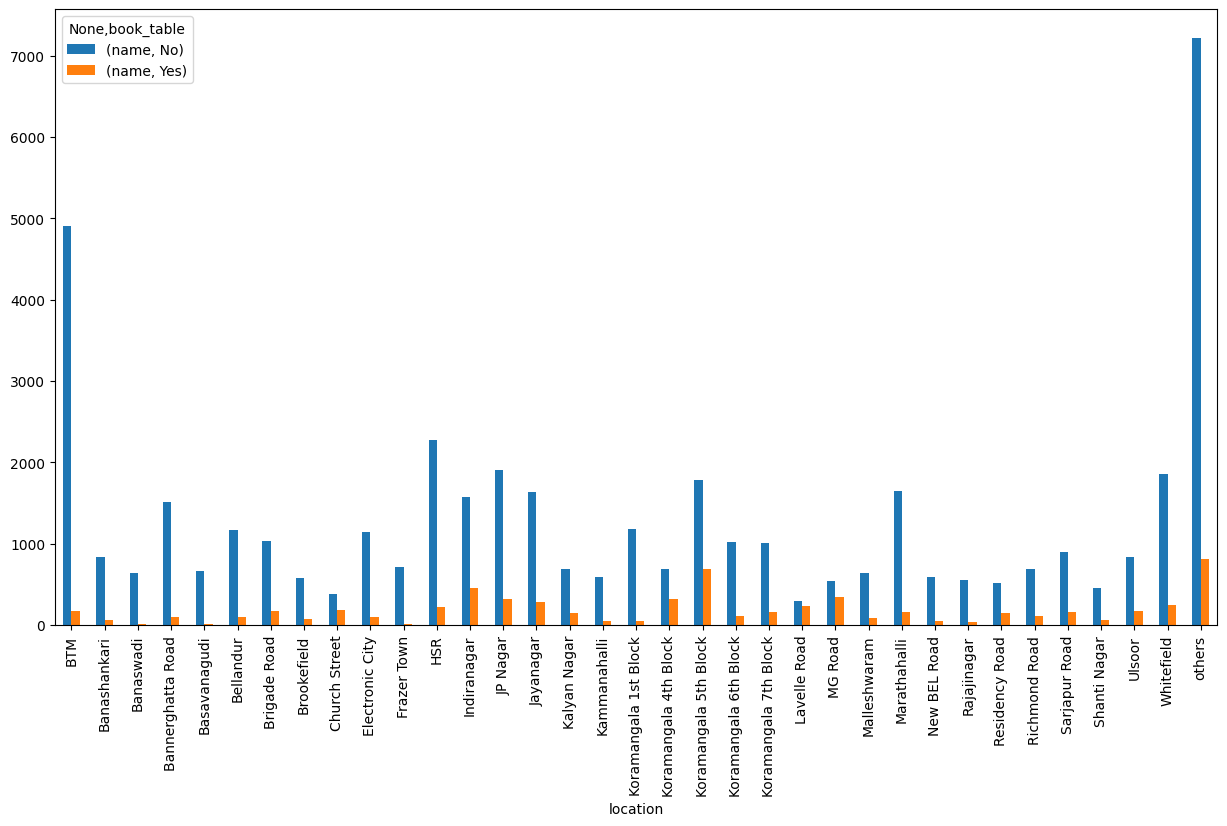

In [76]:
df1.plot(kind='bar',figsize=(15,8))

### Types of Restaurents To Rate

<AxesSubplot: xlabel='type', ylabel='rate'>

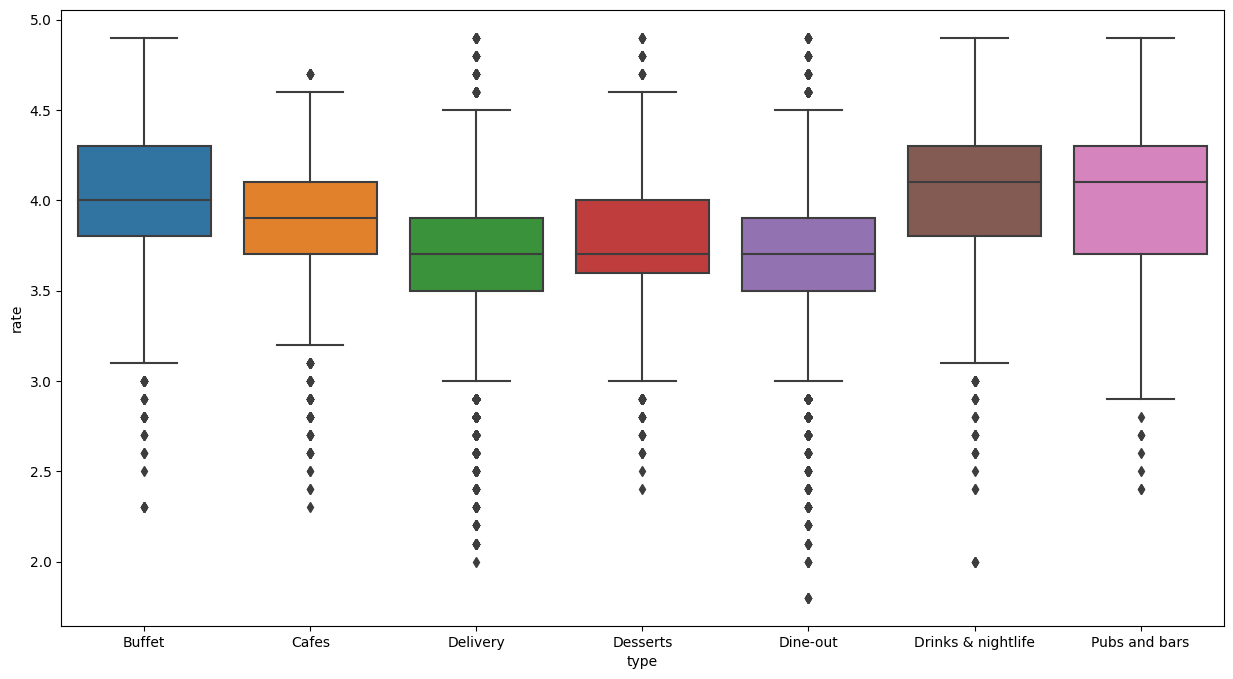

In [81]:
plt.figure(figsize=(15,8))
sns.boxplot(x='type',y='rate',data=df)

### Grouping Restaurant Types to location

In [85]:
df1 = df.groupby(['location','type'])['name'].count()
df1.to_csv('restaurant_type_location_wise.csv')
df1 = pd.read_csv('restaurant_type_location_wise.csv')
df1 = pd.pivot_table(df1,values=None, index=['location'],columns=['type'],fill_value=0,aggfunc=np.sum)
df1

name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3066      198     1662   
Banashankari               7    36      419       71      357   
Banaswadi                  0    24      313       37      264   
Bannerghatta Road          9    46      828      137      580   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      620       75      479   
Brigade Road              25    46      504      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      196       29      215   
Electronic City           23    24      572       71      516   
Frazer Town                1    11      476       56      172   
HSR                       19    49     1696      120      580   
Indiranagar               38    97     1093      140      532   
JP Nagar                  45    76     1152      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      330       35      240   
Koramangala 1st Block      3    26      717       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1076      209      843   
Koramangala 6th Block     18    43      513       70      411   
Koramangala 7th Block     25    52      504      127      417   
Lavelle Road              30    27      129       50      193   
MG Road                   51    76      267       68      343   
Malleshwaram              11    31      272       85      291   
Marathahalli              34    32      980      105      631   
New BEL Road               4    29      338       33      224   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      188       63      290   
Richmond Road             63    21      258       78      356   
Sarjapur Road             26    22      558       82      319   
Shanti Nagar               9    22      201       39      229   
Ulsoor                    16    56      462       71      359   
Whitefield                28    51     1045      137      768   
others                   151   225     4066      512     2798   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          58            22  
Brookefield                            4             0  
Church Street                         36            23  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar                           67            66  
JP Nagar                              51             7  
Jayanagar                             12             0  
Kalyan Nagar                          18             0  
Kammanahalli                           6             0  
Koramangala 1st Block                  7            16  
Koramangala 4th Block                 62            34  
Koramangala 5th Block                 84            58  
Koramangala 6th Block                 51            23  
Koramangala 7th Block                 25            26  
Lavelle Road                          60            34  
MG Road                               53            36  
Malleshwaram  

<AxesSubplot: xlabel='location'>

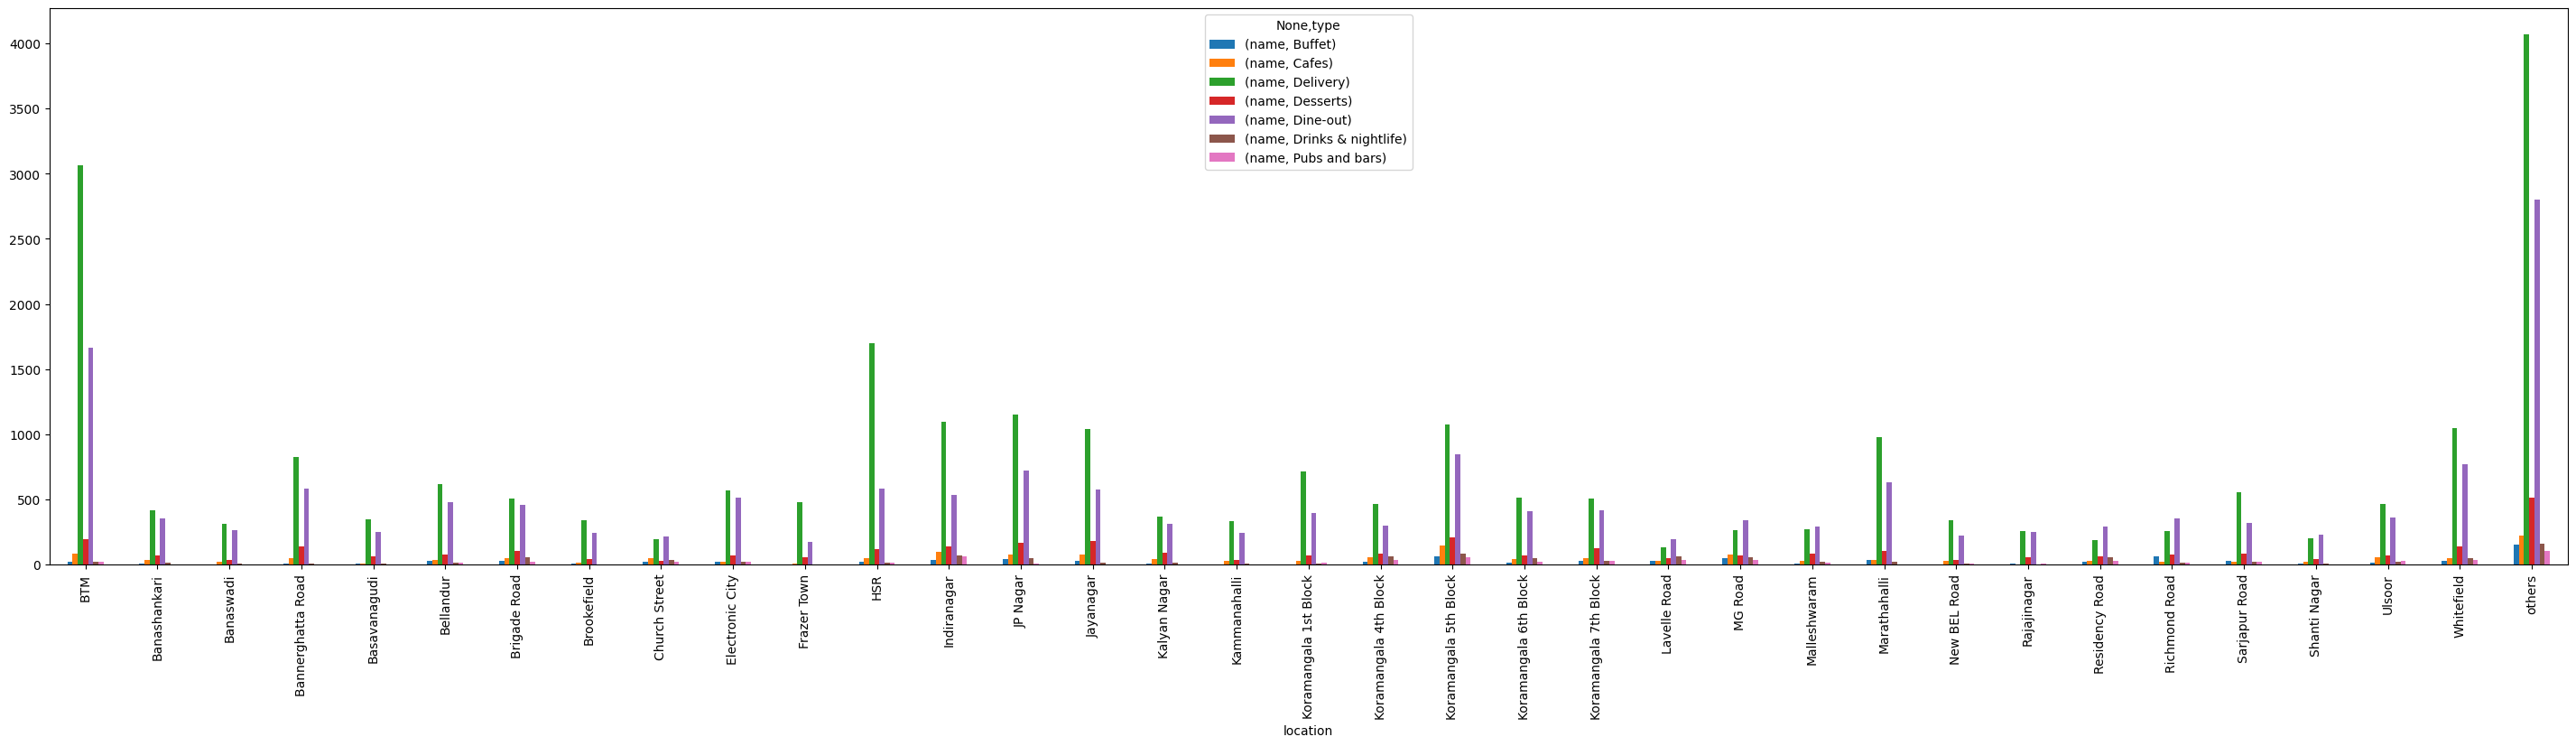

In [88]:
df1.plot(kind='bar',figsize=(36,8))

### Plot the count of votes location wise

In [100]:
df1 = df[['location','votes']]
df1.drop_duplicates()
df2 = df1.groupby(['location'])['votes'].sum()
df2 = df2.to_frame()
df2 = df2.sort_values('votes',ascending=False)
df2.head()

,votes
location,
Koramangala 5th Block,2214827
others,1412555
Indiranagar,1172729
Koramangala 4th Block,685156
Church Street,594979


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'others'),
  Text(2, 0, 'Indiranagar'),
  Text(3, 0, 'Koramangala 4th Block'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Lavelle Road'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'MG Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Koramangala 1st Block'),
  Text(19, 0, 'Malleshwaram'),
  Text(20, 0, 'Bannerghatta Road'),
  Text(21, 0, 'Bellandur'),
  Text(22, 0, 'Ulsoor'),
  Text(23, 0, 'New BEL Road'),
  Text(24, 0, 'Kalyan Nagar'),
  Text(25, 0, 'Banashankari'),
  Text(26, 0, 'Richmond Road'),


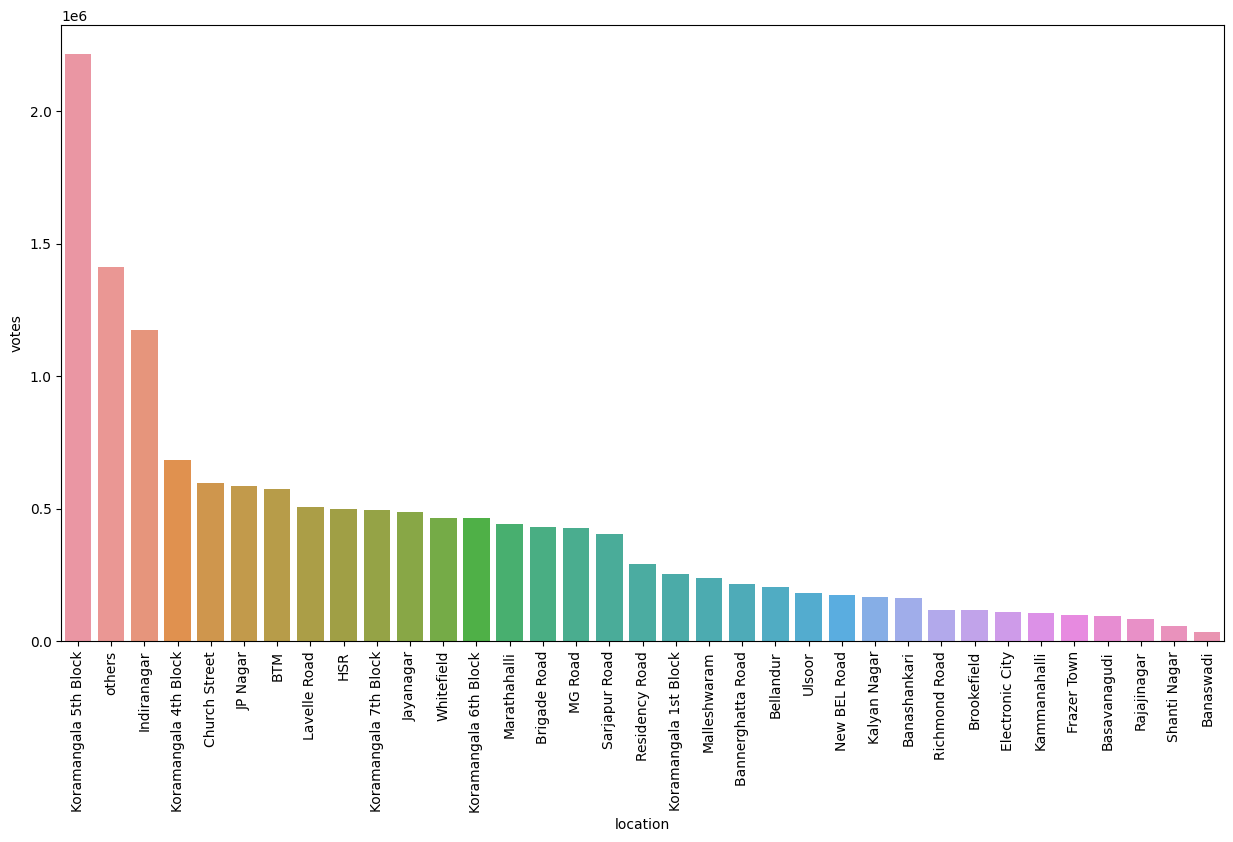

In [108]:
plt.figure(figsize = (15,8))
sns.barplot(x=df2.index, y=df2.votes)
plt.xticks(rotation = 90)

In [111]:
df1 = df[['votes','cuisines']]
df1.drop_duplicates()
df2 = df1.groupby(['cuisines'])['votes'].sum()
df2 = df2.to_frame()
df2 = df2.sort_values('votes',ascending=False)
df2.head()

,votes
cuisines,
others,11589734
North Indian,516346
"North Indian, Chinese",258587
South Indian,161983
"North Indian, Mughlai",103738


In [113]:
df2 = df2.iloc[1:, :]
df2.head()

,votes
cuisines,
North Indian,516346
"North Indian, Chinese",258587
South Indian,161983
"North Indian, Mughlai",103738
Chinese,101736


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

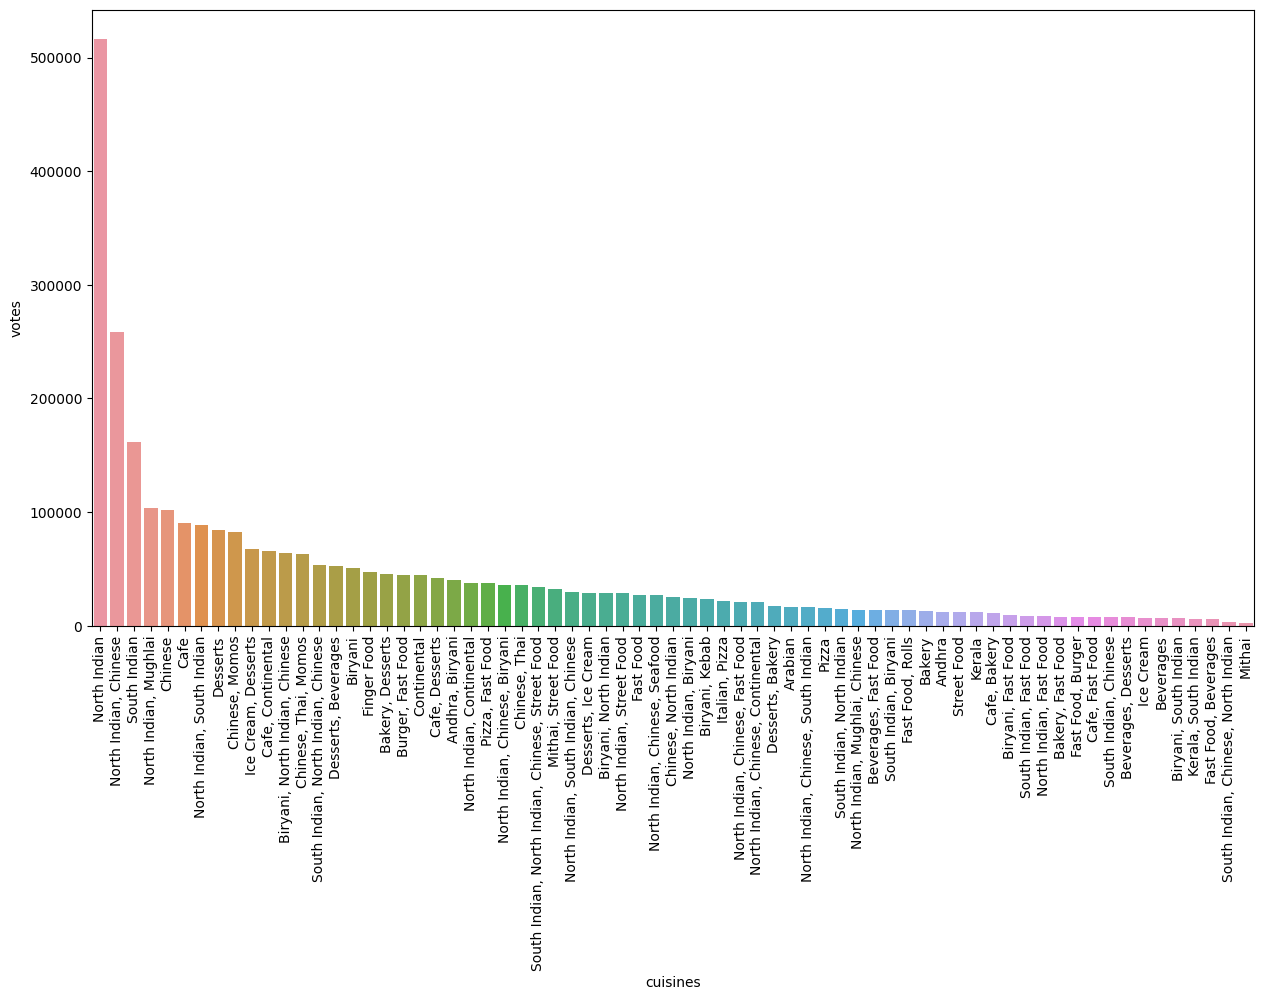

In [114]:
plt.figure(figsize = (15,8))
sns.barplot(x=df2.index, y=df2.votes)
plt.xticks(rotation = 90)